### 1. Среды VTI и кинематика P-волн в них

За основу возьмем следующий источник: 

_Tsvankin, Ilya. Seismic signatures and analysis of reflection data in anisotropic media. Society of Exploration Geophysicists, 2012._

https://library.seg.org/doi/book/10.1190/1.9781560803003


In [1]:
import numpy as np
from numpy import sin, cos, tan, arctan, arcsin, pi
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,5) # это чтобы графики были большего размера. Можно параметры настроить под свой монитор

In [2]:
vp0 = 2000
vs0 = 1000
den = 2.3
de = -0.1
ep = 0.15
ga = 0.15

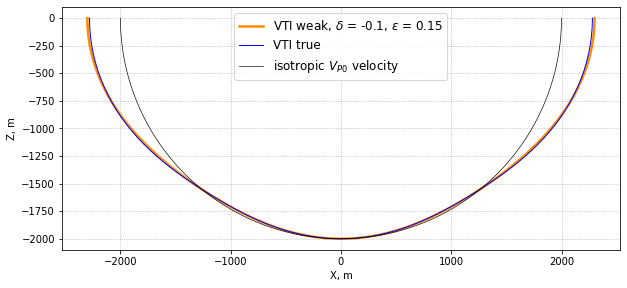

In [3]:
ang = np.linspace(-np.pi/2,np.pi/2,89)

f = 1 - (vs0/vp0)**2


def vp_vti_moderate(vp0, f, de, ep, ang):
    return np.sqrt(vp0**2 * (1 + 2*de*sin(ang)**2*cos(ang)**2 + 2*ep*sin(ang)**4 + (4/f)*(ep-de)*(ep*sin(ang)**2 + de*cos(ang)**2)*sin(ang)**4*cos(ang)**2))

# def vp_vti_true(vp0, f, de, ep, ang):
#     #Thomsen f. 1.55
#     M = 1 + 4 * sin(ang)**2 * (2*de * cos(ang)**2 - ep*cos(2*ang)) / f + 4*ep**2 * sin(ang)**4 / f**2
#     return np.sqrt(vp0**2 * (1 + ep*sin(ang)**2 - 0.5*f + 0.5*f*np.sqrt(M)))

def vp_vti_true(vp0, f, de, ep, ang):
    #Tsvankin f. 1.59
    M = (1 + 2*ep*sin(ang)**2/f)**2 - 2*(ep-de)*sin(2*ang)**2/f
    return np.sqrt(vp0**2 * (1 + ep*sin(ang)**2 - 0.5*f + 0.5*f*np.sqrt(M)))


def vp_vti_weak(vp0, f, de, ep, ang): 
    return vp0*(1 + de*np.sin(ang)**2 + (ep-de)*np.sin(ang)**4)

vp_true = vp_vti_true(vp0, f, de, ep, ang) 
vp_weak = vp_vti_weak(vp0, f, de, ep, ang) 
vp_moder = vp_vti_moderate(vp0, f, de, ep, ang)
    
vp_tr_x = vp_true*np.sin(ang)
vp_tr_z = -vp_true*np.cos(ang)


vp_th_x = vp_weak*np.sin(ang)
vp_th_z = -vp_weak*np.cos(ang)



plt.plot(vp_th_x, vp_th_z, label = r'VTI weak, $\delta$ = {0}, $\varepsilon$ = {1}'.format(de,ep), c = 'darkorange', lw = 2.5)
# plt.plot(vp_moder*np.sin(ang), -vp_moder*np.cos(ang), label = r'VTI moderate', c = 'green', lw = 1.5)
plt.plot(vp_tr_x, vp_tr_z, label = r'VTI true'.format(de,ep), c = 'blue', lw = 1)
plt.plot(vp0*np.sin(ang), -vp0*np.cos(ang), label = 'isotropic $V_{P0}$ velocity', c = 'k', lw = 0.65)

plt.legend(fontsize = 12)
plt.gca().set_aspect(1)


def dvdth_weak(vp0, f, de, ep, ang0, dth = 1e-6):
    angles = np.array([ang0-dth, ang0+dth])
    return np.diff(vp_vti_weak(vp0, f, de, ep, angles))[0]/(2*dth)


def dvdth_true(vp0, f, de, ep, ang0, dth = 1e-6):
    angles = np.array([ang0-dth, ang0+dth])
    return np.diff(vp_vti_true(vp0, f, de, ep, angles))[0]/(2*dth)


def group_vel_true(v_phase, th, vp0, f, de, ep):
    return v_phase*np.sqrt(1+( (1/v_phase) * dvdth_true(vp0, f, de, ep, th) )**2)

def group_vel_weak(v_phase, th, vp0, f, de, ep):
    return v_phase*np.sqrt(1 +( (1/v_phase) * dvdth_weak(vp0, f, de, ep, th) )**2)

def group_angle_true(v_phase, th_phase, vp0, f, de, ep):
    return arctan((tan(th_phase) + dvdth_true(vp0, f, de, ep, th_phase)/v_phase)/(1-(tan(th_phase)/v_phase)*dvdth_true(vp0, f, de, ep, th_phase)))

def group_angle_weak(v_phase, th_phase, vp0, f, de, ep):
    return arctan((tan(th_phase) + dvdth_weak(vp0, f, de, ep, th_phase)/v_phase)/(1-(tan(th_phase)/v_phase)*dvdth_weak(vp0, f, de, ep, th_phase)))

def phase_vel(v_phase, th_phase, vp0, f, de, ep):
    pass


v_gr_true = np.zeros_like(vp_weak)
v_gr_weak = np.zeros_like(vp_weak)
fi_gr_true = np.zeros_like(vp_weak)
fi_gr_weak = np.zeros_like(vp_weak)
dvdth_tr = np.zeros_like(vp_weak)
dvdth_w = np.zeros_like(vp_weak)



for ith, th_phase in enumerate(ang):
    
    v_phase = vp_weak[ith]
    
    dvdth_tr[ith] = dvdth_true(vp0, f, de, ep, th_phase)
    dvdth_w[ith]= dvdth_weak(vp0, f, de, ep, th_phase)
    
    fi_gr_weak[ith] = group_angle_weak(v_phase, th_phase, vp0, f, de, ep)
    fi_gr_true[ith] = group_angle_true(v_phase, th_phase, vp0, f, de, ep)
    
    v_gr_true[ith] = group_vel_true(v_phase, th_phase, vp0, f, de, ep)
    v_gr_weak[ith] = group_vel_weak(v_phase, th_phase, vp0, f, de, ep)


plt.grid(True, ls=':')
plt.xlabel('X, m')
plt.ylabel('Z, m')

plt.show()


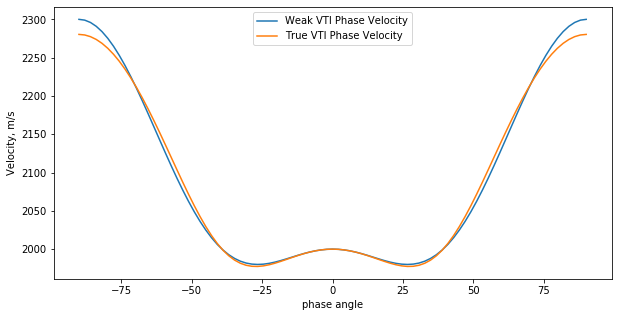

In [4]:
plt.plot(180*ang/pi, vp_weak, label = 'Weak VTI Phase Velocity')
plt.plot(180*ang/pi, vp_true, label = 'True VTI Phase Velocity')
# plt.plot(180*ang/pi, dvdth_tr)
# plt.plot(180*ang/pi, dvdth_w)
plt.legend()
plt.xlabel('phase angle')
plt.ylabel('Velocity, m/s')
plt.show()

(-90, 90)

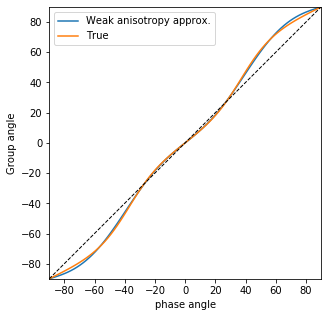

In [5]:
plt.plot(180*ang/pi, 180*fi_gr_weak/pi, label = 'Weak anisotropy approx.')
plt.plot(180*ang/pi, 180*fi_gr_true/pi, label = 'True')
plt.plot(180*ang/pi, 180*ang/pi, ls = '--', c='k', lw =1)
plt.gca().set_aspect(1)
plt.xlabel('phase angle')
plt.ylabel('Group angle')
plt.legend()
plt.xlim([-90,90])
plt.ylim([-90,90])


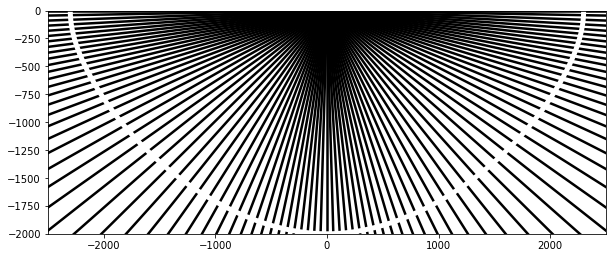

In [6]:
# Tsvankin, fig.1.11

vp_gr_x = v_gr_true*sin(fi_gr_true)
vp_gr_z = -v_gr_true*cos(fi_gr_true)


for ifi, fi in enumerate(fi_gr_true):
    plt.plot([0,vp_gr_x[ifi]*2], [0, vp_gr_z[ifi]*2], c='k', lw=2.5)
    
plt.plot(vp_gr_x, vp_gr_z, label = r'VTI weak Group, $\delta$ = {0}, $\varepsilon$ = {1}'.format(de,ep), c = 'w', lw = 5)




# plt.plot(vp0*np.sin(ang), -vp0*np.cos(ang), label = 'isotropic $V_{P0}$ velocity', c = 'darkorange', lw = 0.65)

# plt.legend(fontsize = 12)
plt.xlim([-2500, 2500])
plt.ylim([-2000, 0])
plt.gca().set_aspect(1)

Сравнение с M.Slawinski et al., A generalized form of Snell’s law in anisotropic media https://library.seg.org/doi/10.1190/1.1444759 


(-0.00035, 0.00035)

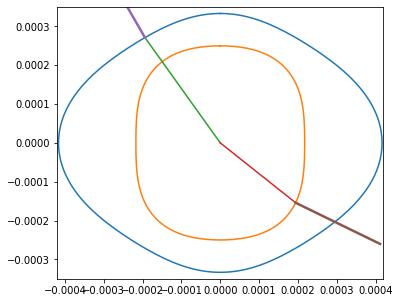

In [7]:

start_angle = pi*35.5728/180.0
# start_angle = pi*12/180.0
# start_angle = pi*np.arange(5,31,5)/180.0

f = 1-0.5**2

v1 = 3000
de1 = 0.1
ep1 = -0.2
v2 = 4000
de2 = -0.2
ep2 = 0.15


th_ph_1 = start_angle

v_ph_1 = vp_vti_weak(v1, f, de1, ep1, th_ph_1)

fi_gr_1 = group_angle_weak(v_ph_1, th_ph_1, v1, f,de1,ep1)

v_gr_1 = group_vel_weak(v_ph_1, th_ph_1, v1, f, de1, ep1)

p_ray = sin(th_ph_1)/v_ph_1

A4 = p_ray*v2*(ep2-de2)
A3 = 0
A2 = p_ray*v2*de2
A1 = -1
A0 = p_ray*v2
th_ph_possible = np.roots([A4, A3, A2, A1, A0])
th_poss_real = np.real(th_ph_possible)[np.isclose(th_ph_possible, np.real(th_ph_possible))]


th_ph_2 = arcsin(th_poss_real[np.abs(th_poss_real)<1][0])
v_ph_2 = vp_vti_weak(v2, f, de2, ep2, th_ph_2)

fi_gr_2 = group_angle_weak(v_ph_2, th_ph_2, v2,f,de2,ep2)
v_gr_2 = group_vel_weak(v_ph_2, th_ph_2, v2, f, de2, ep2)



an_rng = pi*np.arange(0,362,2)/180
surf1=np.zeros_like(an_rng)
surf2=np.zeros_like(an_rng)

for ian, an in enumerate(an_rng):
    surf1[ian] = 1./vp_vti_weak(v1, f, de1, ep1, an)
    surf2[ian] = 1./vp_vti_weak(v2, f, de2, ep2, an)

plt.plot(surf1*sin(an_rng), surf1*cos(an_rng))
plt.plot(surf2*sin(an_rng), surf2*cos(an_rng))


length = 0.0001
[(-1./vp_vti_weak(v1, f, de1, ep1, th_ph_1))*sin(th_ph_1), 0]

ph_line_1_x = np.array([(-1./vp_vti_weak(v1, f, de1, ep1, th_ph_1))*sin(th_ph_1), 0])
ph_line_1_y = np.array([(1./vp_vti_weak(v1, f, de1, ep1, th_ph_1))*cos(th_ph_1), 0])
plt.plot(ph_line_1_x, ph_line_1_y)

ph_line_2_x = [(1./vp_vti_weak(v2, f, de2, ep2, th_ph_2))*sin(th_ph_2), 0]
ph_line_2_y = [(-1./vp_vti_weak(v2, f, de2, ep2, th_ph_2))*cos(th_ph_2), 0]
plt.plot(ph_line_2_x, ph_line_2_y)


gr_line_1_x = ph_line_1_x[0] + np.array([-1./v_gr_1*sin(fi_gr_1), 0])
gr_line_1_y = ph_line_1_y[0] + np.array([1./v_gr_1*cos(fi_gr_1), 0])
plt.plot(gr_line_1_x, gr_line_1_y, lw = 2.5)

gr_line_2_x = ph_line_2_x[0] + np.array([1./v_gr_2*sin(fi_gr_2), 0])
gr_line_2_y = ph_line_2_y[0] + np.array([-1./v_gr_2*cos(fi_gr_2), 0])
plt.plot(gr_line_2_x, gr_line_2_y, lw = 2.5)

plt.gca().set_aspect(1)
plt.xlim([-4.2e-4, 4.2e-4])
plt.ylim([-3.5e-4, 3.5e-4])

In [8]:
print('\t \tIncidence\tTransmission')
print('Group angles \t  {0:.2f}\t \t  {1:.2f} '.format(180*fi_gr_1/pi, 180*fi_gr_2/pi))
print('Phase angles \t  {0:.2f}\t \t  {1:.2f} '.format(180*th_ph_1/pi, 180*th_ph_2/pi))
print('Group vel\'s\t  {0:.0f}\t \t  {1:.0f} '.format(v_gr_1, v_gr_2))
print('Phase vel\'s\t  {0:.0f}\t \t  {1:.0f} '.format(v_ph_1, v_ph_2))

	 	Incidence	Transmission
Group angles 	  30.00	 	  64.01 
Phase angles 	  35.57	 	  51.53 
Group vel's	  3013	 	  4133 
Phase vel's	  2998	 	  4036 
